# Exercise 2 Part 1

The minimiser for the function $q1$ depends on the value of $t$.

The minimiser occurs at: $(x_1, x_2) = ((1+t)/t^2 , -\sqrt{t} / t^2)$

This function is convex as it always has a positive determinant for its hessian, for all $t$, and has a global minima for that matter

Now for $q2$

The minimiser occurs at $(x_1, x_2) = (1/11 , 7/11)$

And the minimum value = $-0.681818$

The hessian has a positive determinant and hence is convex. Also, it has a global minima.

# Exercise 2 Part 2

[[1000999.99970133]
 [ -31622.77659225]]
[[-500499.99999997]]


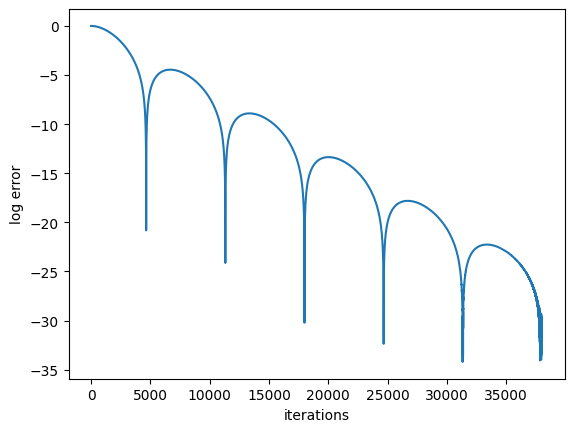

In [ ]:
#exercise 2 part 2 - Nesterov

import numpy as np
import math as m

def q1(x,t):
    b1 = np.array([[1],[0]])
    W = np.array([[t, m.sqrt(t)],[m.sqrt(t), (1+t)]])

    q1_val = 0.5*(x.T @ W @ x) - b1.T @ x

    return q1_val

def step_size_a(t):
    a = 2/(3 + m.sqrt(9 - 4*t**2))
    return a

def u_0(t):
    u0 = (3 + m.sqrt(9 - 4*t**2))/(3 - m.sqrt(9 - 4*t**2))
    return u0

def momentum_b(u0):
    b_val = (m.sqrt(u0) - 1)/(m.sqrt(u0) + 1)
    return b_val

def grad(x,t):
    g = np.zeros((2,1))

    g[0][0] = 0.5*(2*t*x[0] + 2*m.sqrt(t)*x[1]) - 1
    g[1][0] = 0.5*(2*m.sqrt(t)*x[0] + 2*x[1]*(t+1))

    return g


#defining the norm calculation for the gradient

def norm(gradient): #here we are taking the gradient as an array type argument for our function

    return np.linalg.norm(gradient)


def nesterov(x0, toler, a, b):
    x_old = x0
    x_curr = x0

    iter = 0

    t = 0.001

    I = []
    loge = []

    while (norm(grad(x_curr,t)) > toler):
        grad_per = grad(x_curr + b*(x_curr - x_old), t)

        #to hold matrix
        hold_m = x_curr

        #updating
        x_curr = x_curr - a * grad_per + b*(x_curr - x_old)

        #updating value to x_old to previous x_curr
        x_old = hold_m

        #updating iterations
        iter = iter + 1

        #appending error values
        error = abs((q1(x_curr,t) - (-500499.99999997))/(-500499.99999997))

        loge.append(m.log(error))
        I.append(iter)

    plt.plot(I, loge)
    plt.xlabel('iterations')
    plt.ylabel('log error')

    return x_curr, q1(x_curr, t)


t = 0.001

a = step_size_a(t)

u = u_0(t)

b = momentum_b(u)

toler = 0.000000001

x0 = np.array([[3], [5]])

x_final , func_min = nesterov(x0, toler, a, b)

print(x_final)
print(func_min)


In [ ]:
#exercise 2 part 2 - gradient descent

import numpy as np
import math as m

def q1(x,t):
    b1 = np.array([[1],[0]])
    W = np.array([[t, m.sqrt(t)],[m.sqrt(t), (1+t)]])

    q1_val = 0.5*(x.T @ W @ x) - b1.T @ x

    return q1_val

def step_size_a(t):
    a = 2/(3 + m.sqrt(9 - 4*t**2))
    return a

def grad(x,t):
    g = np.zeros((2,1))

    g[0][0] = 0.5*(2*t*x[0] + 2*m.sqrt(t)*x[1]) - 1
    g[1][0] = 0.5*(2*m.sqrt(t)*x[0] + 2*x[1]*(t+1))

    return g


#defining the norm calculation for the gradient

def norm(gradient): #here we are taking the gradient as an array type argument for our function

    return np.linalg.norm(gradient)


def gradient_descent(x0, toler):

    x = x0;
    t = 0.001
    a = step_size_a(t)
    count = 0

    while(norm(grad(x,t))>toler):
        x = x - a*grad(x,t)
        count = count + 1

    return x, count


x0 = np.array([[3], [5]])
toler = 10**(-8)

x_min, iter = gradient_descent(x0, toler)

print("The minimiser = ", x_min)
print("The Minima = ", q1(x_min))
print("The total iterations = ", iter)

KeyboardInterrupt: 

Clearly nesterov acceleration method is faster as it uses less iterations and reaches same converging point at same accuracy as gradient descent

# Exercise 2 Part 3

[[0.09090909]
 [0.63636364]]
[-0.68181818]
iterations =  20


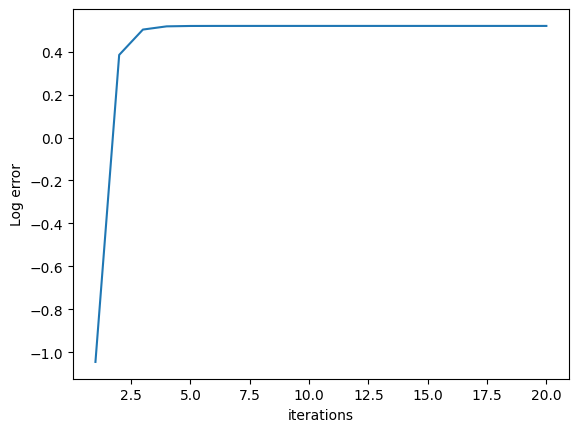

In [ ]:
#exercise 2 part 3 - Nesterov

import numpy as np
import math as m
import matplotlib.pyplot as plt

def q2(x):
    return 2*x[0]**2 + x[0]*x[1] + (1.5)*x[1]**2 - x[0] - 2*x[1]

def step_size_a():
    a = 2/(7 + m.sqrt(5))
    return a

def u_0():
    u0 = (7 + m.sqrt(5))/(7 - m.sqrt(5))
    return u0

def momentum_b(u0):
    b_val = (m.sqrt(u0) - 1)/(m.sqrt(u0) + 1)
    return b_val

def grad(x):
    g = np.zeros((2,1))
    g[0][0]  = 4*x[0] + x[1] - 1
    g[1][0]  = 3*x[1] + x[0] - 2
    return g


#defining the norm calculation for the gradient

def norm(gradient): #here we are taking the gradient as an array type argument for our function

    return np.linalg.norm(gradient)


def nesterov(x0, toler, a, b):
    x_old = x0
    x_curr = x0

    iter = 0

    loge = []
    I = []

    while (norm(grad(x_curr)) > toler):
        grad_per = grad(x_curr + b*(x_curr - x_old))

        #to hold matrix
        hold_m = x_curr

        #updating
        x_curr = x_curr - a * grad_per + b*(x_curr - x_old)

        #updating value to x_old to previous x_curr
        x_old = hold_m

        #updating iterations
        iter = iter + 1

        #Appending Error and Iterations

        error = abs(q2(x_curr) - (-0.68181818)/(-0.6818181818))

        loge.append(m.log(error))
        I.append(iter)

    plt.plot(I, loge)
    plt.xlabel('iterations')
    plt.ylabel('Log error')

    return x_curr, q2(x_curr), iter


a = step_size_a()

u = u_0()

b = momentum_b(u)

toler = 0.000000001

x0 = np.array([[3], [5]])

x_final , func_min, iter = nesterov(x0, toler, a, b)

print(x_final)
print(func_min)
print("iterations = ", iter)



In [ ]:
#exercise 2 part 3 - gradient descent

import numpy as np
import math as m

def q2(x):
    return 2*x[0]**2 + x[0]*x[1] + (1.5)*x[1]**2 - x[0] - 2*x[1]

def step_size_a():
    a = 2/(7 + m.sqrt(5))
    return a

def grad(x):
    g = np.zeros((2,1))
    g[0][0]  = 4*x[0] + x[1] - 1
    g[1][0]  = 3*x[1] + x[0] - 2
    return g

#defining the norm calculation for the gradient

def norm(gradient): #here we are taking the gradient as an array type argument for our function

    return np.linalg.norm(gradient)

def gradient_descent(x0, toler):

    x = x0;
    a = step_size_a()
    count = 0

    while(norm(grad(x))>toler):
        x = x - a*grad(x)
        count = count + 1

    return x, count


x0 = np.array([[3], [5]])
toler = 10**(-8)

x_min, iter = gradient_descent(x0, toler)

print("The minimiser = ", x_min)
print("The Minima = ", q2(x_min))
print("The total iterations = ", iter)

The minimiser =  [[0.09090909]
 [0.63636364]]
The Minima =  [-0.68181818]
The total iterations =  28


Clearly nesterov acceleration method is faster as it uses less iterations and reaches same converging point at same accuracy as gradient descent

# Exercise 2 Part 4

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

def func(x):
    f = 100*(x[1]-x[0]**2)**2 + (0.5-x[0])**2
    return f

def gradient(x):
    grad = np.zeros((2,1))

    grad[0][0] = -400*x[0]*(x[1] - x[0]**2) - 2*(0.5 - x[0])
    grad[1][0] = 200*(x[1] - x[0]**2)

    return grad

def step_size_a(R, norm_grad_matrix):
    a = R/norm(norm_grad_matrix)
    return a

def norm(m):
    return np.linalg.norm(m)

def ada_grad(x0, max_iter_T):
    x = x0
    t = 0
    T = max_iter_T

    norm_grad_matrix = np.zeros((T,1))

    while (t<T):

      #print("X before iteration = ", x)

      norm_grad_matrix[t] = norm(gradient(x))

      #print("Norm_grad_matrix = ", norm_grad_matrix)

      #to compute for R in our set
      max = 0
      y = np.zeros((2,1))
      for i in range(-100,100):
        for j in range(-100,100):
           diff = 0
           diff = (m.sqrt((x[0]-i/100)**2 + (x[1] - j/100)**2)) ** 2
           if (diff>max and m.sqrt((i/100)**2 + (j/100)**2) <= 1): #second condition to make sure we lie in convex set L
                  min = diff
                  y[0] = i/100
                  y[1] = j/100
      #print("Y = ",y)

      R = norm(x-y)
      #print("R = ", R)

      a = step_size_a(R, norm_grad_matrix)

      #Now to find z in the term P(w) = 0.5 * argmin(||z-w||^2)
      #where w = x - a*grad(x)

      w = x - a*gradient(x)

      #print("W = ", w)

      z = np.zeros((2,1))

      min = 10000000
      for i in range(-100,100):
              for j in range(-100,100):
                  diff = 0
                  diff = (m.sqrt((w[0]-i/100)**2 + (w[1] - j/100)**2)) ** 2
                  if (diff<min and m.sqrt((i/100)**2 + (j/100)**2) <= 1): #second condition to make sure we lie in convex set L
                      min = diff
                      z[0] = i/100
                      z[1] = j/100

      #print("Z = ", z)

      #after finding z
      #we update x

      x = 0.5 * z

      #updating t
      t = t+1

      #print("X updated = ", x)
      #print()

      per_error = func(x) * 100 #since it is from zero (which is our minima)

    return x, func(x), per_error


x0 = np.array([[0],[0]])

T = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]

t = []
e = []

for i in range(len(T)):

    x_min, min, error_percent = ada_grad(x0, T[i])

    print("For max iterations = ", T[i])
    print("The minimiser = ", x_min)
    print("The minima = ", min)
    print("The error = ", error_percent)
    print()

    t.append(T[i])
    e.append(error_percent)
    #plot error vs iteration

plt.plot(t,e)

For max iterations =  100
The minimiser =  [[0.01 ]
 [0.005]]
The minima =  [0.242501]
The error =  [24.2501]

For max iterations =  500
The minimiser =  [[0.01 ]
 [0.005]]
The minima =  [0.242501]
The error =  [24.2501]



KeyboardInterrupt: 

Once again, here we do not reach our minmiser nor our minima
as shown in the program below for 11 iterations

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

def func(x):
    f = 100*(x[1]-x[0]**2)**2 + (0.5-x[0])**2
    return f

def gradient(x):
    grad = np.zeros((2,1))

    grad[0][0] = -400*x[0]*(x[1] - x[0]**2) - 2*(0.5 - x[0])
    grad[1][0] = 200*(x[1] - x[0]**2)

    return grad

def step_size_a(R, norm_grad_matrix):
    a = R/norm(norm_grad_matrix)
    return a

def norm(m):
    return np.linalg.norm(m)

def ada_grad(x0, max_iter_T):
    x = x0
    t = 0
    T = max_iter_T

    norm_grad_matrix = np.zeros((T,1))

    while (t<T):

      print("X before iteration = ", x)

      norm_grad_matrix[t] = norm(gradient(x))

      print("Norm_grad_matrix = ", norm_grad_matrix)

      #to compute for R in our set
      max = 0
      y = np.zeros((2,1))
      for i in range(-100,100):
        for j in range(-100,100):
           diff = 0
           diff = (m.sqrt((x[0]-i/100)**2 + (x[1] - j/100)**2)) ** 2
           if (diff>max and m.sqrt((i/100)**2 + (j/100)**2) <= 1): #second condition to make sure we lie in convex set L
                  min = diff
                  y[0] = i/100
                  y[1] = j/100
      print("Y = ",y)

      R = norm(x-y)
      print("R = ", R)

      a = step_size_a(R, norm_grad_matrix)

      #Now to find z in the term P(w) = 0.5 * argmin(||z-w||^2)
      #where w = x - a*grad(x)

      w = x - a*gradient(x)

      print("W = ", w)

      z = np.zeros((2,1))

      min = 10000000
      for i in range(-100,100):
              for j in range(-100,100):
                  diff = 0
                  diff = (m.sqrt((w[0]-i/100)**2 + (w[1] - j/100)**2)) ** 2
                  if (diff<min and m.sqrt((i/100)**2 + (j/100)**2) <= 1): #second condition to make sure we lie in convex set L
                      min = diff
                      z[0] = i/100
                      z[1] = j/100

      print("Z = ", z)

      #after finding z
      #we update x

      x = 0.5 * z

      #updating t
      t = t+1

      print("X updated = ", x)
      print()


    return x

x0 = np.array([[0],[0]])

x_min = ada_grad(x0, 10)

#print(x_min)

X before iteration =  [[0]
 [0]]
Norm_grad_matrix =  [[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Y =  [[0.99]
 [0.14]]
R =  0.9998499887483121
W =  [[0.99984999]
 [0.        ]]
Z =  [[0.99]
 [0.  ]]
X updated =  [[0.495]
 [0.   ]]

X before iteration =  [[0.495]
 [0.   ]]
Norm_grad_matrix =  [[ 1.        ]
 [68.95085351]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
Y =  [[0.99]
 [0.14]]
R =  0.5144171459039832
W =  [[0.13316033]
 [0.36556997]]
Z =  [[0.13]
 [0.37]]
X updated =  [[0.065]
 [0.185]]

X before iteration =  [[0.065]
 [0.185]]
Norm_grad_matrix =  [[ 1.        ]
 [68.95085351]
 [36.58156087]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
Y =  [[0.99]
 [0.14]]
R =  0.9260939477180488
W =  [[ 0.13108319]
 [-0.24393597]]
Z =  [[ 0.13]
 [-0.24]]
X updated =  [[ 0.065]
 [-0.12 ]]

X before iteration =  [[ 0.065]
 [-0.12 ]]
Norm_gra

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

def func(x):
    f = np.sin(5 * x[1] - 5) * np.exp(((1 - np.cos(5 * x[0] - 5)) ** 2)) + \
         np.cos(5 * x[0] - 5) * np.exp(((1 - np.sin(5 * x[1] - 5)) ** 2)) + \
         25 * (x[0] - x[1]) ** 2
    return f

def gradient(x):
    grad = np.zeros((2,1))

    grad[0][0] = 5 * np.cos(5 * x[0] - 5) * np.exp(((1 - np.cos(5 * x[0] - 5)) ** 2)) - \
         25 * (x[0] - x[1])
    grad[1][0] = -5 * np.sin(5 * x[1] - 5) * np.exp(((1 - np.sin(5 * x[1] - 5)) ** 2)) + \
         25 * (x[0] - x[1])

    return grad

def step_size_a(R, norm_grad_matrix):
    a = R/norm(norm_grad_matrix)
    return a

def norm(m):
    return np.linalg.norm(m)

def ada_grad(x0, max_iter_T):
    x = x0
    t = 0
    T = max_iter_T

    norm_grad_matrix = np.zeros((T,1))

    while (t<T):

      #print("X before iteration = ", x)

      norm_grad_matrix[t] = norm(gradient(x))

      #print("Norm_grad_matrix = ", norm_grad_matrix)

      #to compute for R in our set
      max = 0
      y = np.zeros((2,1))
      for i in range(-100,100):
        for j in range(-100,100):
           diff = 0
           diff = (m.sqrt((x[0]-i/100)**2 + (x[1] - j/100)**2)) ** 2
           if (diff>max and m.sqrt((i/100)**2 + (j/100)**2) <= 1): #second condition to make sure we lie in convex set L
                  min = diff
                  y[0] = i/100
                  y[1] = j/100
      #print("Y = ",y)

      R = norm(x-y)
      #print("R = ", R)

      a = step_size_a(R, norm_grad_matrix)

      #Now to find z in the term P(w) = 0.5 * argmin(||z-w||^2)
      #where w = x - a*grad(x)

      w = x - a*gradient(x)

      #print("W = ", w)

      z = np.zeros((2,1))

      min = 10000000
      for i in range(-100,100):
              for j in range(-100,100):
                  diff = 0
                  diff = (m.sqrt((w[0]-i/100)**2 + (w[1] - j/100)**2)) ** 2
                  if (diff<min and m.sqrt((i/100)**2 + (j/100)**2) <= 1): #second condition to make sure we lie in convex set L
                      min = diff
                      z[0] = i/100
                      z[1] = j/100

      #print("Z = ", z)

      #after finding z
      #we update x

      x = 0.5 * z

      #updating t
      t = t+1

      #print("X updated = ", x)
      #print()

      per_error = (func(x) - 1) * 100 #since it is from one (which is our minima)

    return x, func(x), per_error


x0 = np.array([[0],[0]])

T = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]

t = []
e = []

for i in range(len(T)):

    x_min, min, error_percent = ada_grad(x0, T[i])

    print("For max iterations = ", T[i])
    print("The minimiser = ", x_min)
    print("The minima = ", min)
    print("The error = ", error_percent)
    print()

    t.append(T[i])
    e.append(error_percent)
    #plot error vs iteration

plt.plot(t,e)

For max iterations =  100
The minimiser =  [[-0.045]
 [ 0.055]]
The minima =  [2.03681035]
The error =  [103.68103544]



KeyboardInterrupt: 

Over here, it may be the case that the minimiser doesn't even lie in the region we are given to sample from.

Hence, we may not ever reach the minimiser.

# Exercise 2 Part 5

The minimiser =  [[0.09090909]
 [0.63636364]]
The minimum =  [-0.68181818]
Total iterations =  9


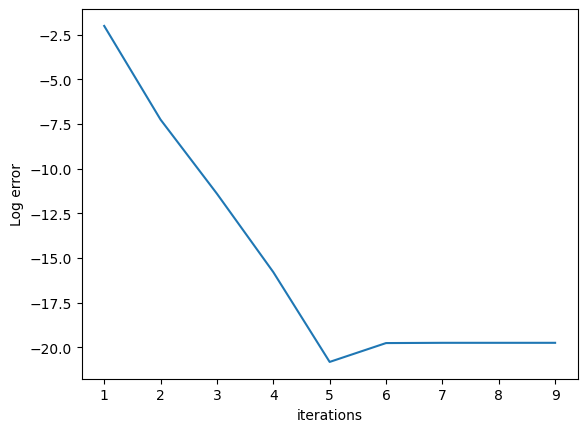

In [ ]:
#Exercise 2 part 5 - Conjugate Gradient
import numpy as np
import matplotlib.pyplot as plt

def q2(x):
    return 2*x[0]**2 + x[0]*x[1] + (1.5)*x[1]**2 - x[0] - 2*x[1]

def gradient(x):
    g = np.zeros((2,1))
    g[0][0]  = 4*x[0] + x[1] - 1
    g[1][0]  = 3*x[1] + x[0] - 2
    return g

def hess(x):
    h = np.array([[4,1],[1,3]])
    return h


def norm(r):
    return np.linalg.norm(r)


def a_val(r, h, d):
    return (r.T @ r)/(d.T @ h @ d)


def b_val(r_curr, r_new):
    return (r_new.T @ r_new)/(r_curr.T @ r_curr)


def conj_grad(x0, toler):

    x = x0
    r = -gradient(x)
    d = r

    count = 0

    r_curr = r

    I = []
    loge = []

    while(norm(r_curr) > toler):

        #declare hessian and find at x
        h = hess(x)

        #update for a
        a = a_val(r_curr, h, d)

        #update for x
        x = x + a*d

        #finding r_i+1
        r_new = r_curr - a* h @ d

        #finding b
        b = b_val(r_curr, r_new)

        #update for d
        d = r_new - b*d

        #replacing r_i with r_i+1 for next iteration
        r_curr = r_new

        #updating count for iterations
        count = count + 1

        #appending log error and iterations
        error  = abs((q2(x)-(-0.68181818))/(-0.68181818))

        loge.append(m.log(error))
        I.append(count)

    plt.plot(I, loge)
    plt.xlabel('iterations')
    plt.ylabel('Log error')

    return x, count

toler = 10**(-8)

x0 = np.array([[5],[3]])

x_min, iter = conj_grad(x0, toler)

print("The minimiser = ", x_min)
print("The minimum = ", q2(x_min))
print("Total iterations = ", iter)

In [ ]:
#exercise 2 part 5 - gradient descent

import numpy as np
import math as m

def q2(x):
    return 2*x[0]**2 + x[0]*x[1] + (1.5)*x[1]**2 - x[0] - 2*x[1]

def step_size_a():
    a = 2/(7 + m.sqrt(5))
    return a

def grad(x):
    g = np.zeros((2,1))
    g[0][0]  = 4*x[0] + x[1] - 1
    g[1][0]  = 3*x[1] + x[0] - 2
    return g

#defining the norm calculation for the gradient

def norm(gradient): #here we are taking the gradient as an array type argument for our function

    return np.linalg.norm(gradient)

def gradient_descent(x0, toler):

    x = x0;
    a = step_size_a()
    count = 0

    while(norm(grad(x))>toler):
        x = x - a*grad(x)
        count = count + 1

    return x, count


x0 = np.array([[3], [5]])
toler = 10**(-8)

x_min, iter = gradient_descent(x0, toler)

print("The minimiser = ", x_min)
print("The Minima = ", q2(x_min))
print("The total iterations = ", iter)

The minimiser =  [[0.09090909]
 [0.63636364]]
The Minima =  [-0.68181818]
The total iterations =  28


Clearly conjugate gradient method is faster as it uses less iterations and reaches same converging point at same accuracy as gradient descent